# Task 1: Data Understanding & Cleaning

In [1]:
# Step 1: Load the datasets
import pandas as pd

customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
orders = pd.read_csv("orders.csv")
order_items = pd.read_csv("order_items.csv")


In [2]:
# Step 2: Understand the data
customers.info()
products.info()
orders.info()
order_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   City          200 non-null    object
 3   Age           200 non-null    int64 
 4   Gender        200 non-null    object
 5   SignupDate    200 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    50 non-null     object
 1   ProductName  50 non-null     object
 2   Category     50 non-null     object
 3   UnitPrice    50 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Col

In [3]:
# Step 3: Convert date columns
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])


In [4]:
# Step 4: Check duplicates
customers.duplicated().sum()
products.duplicated().sum()
orders.duplicated().sum()
order_items.duplicated().sum()


np.int64(0)

In [5]:
# Step 5: Merge datasets
# Merge order_items with products
df = pd.merge(order_items, products, on='ProductID', how='left')

# Merge with orders
df = pd.merge(df, orders, on='OrderID', how='left')

# Merge with customers
df = pd.merge(df, customers, on='CustomerID', how='left')


In [6]:
# Step 6: Create Revenue column 
df['Revenue'] = df['Quantity'] * df['UnitPrice'] * (1 - df['DiscountPercent'] / 100)


In [7]:
# Step 7: Final dataset check
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderItemID      1200 non-null   object        
 1   OrderID          1200 non-null   object        
 2   ProductID        1200 non-null   object        
 3   Quantity         1200 non-null   int64         
 4   DiscountPercent  1200 non-null   int64         
 5   ProductName      1200 non-null   object        
 6   Category         1200 non-null   object        
 7   UnitPrice        1200 non-null   int64         
 8   CustomerID       1200 non-null   object        
 9   OrderDate        1200 non-null   datetime64[ns]
 10  PaymentMode      1200 non-null   object        
 11  CustomerName     1200 non-null   object        
 12  City             1200 non-null   object        
 13  Age              1200 non-null   int64         
 14  Gender           1200 non-null   object 

# Task 2: Exploratory Data Analysis

In [8]:
# Step 1: Total Revenue Generated
total_revenue = df['Revenue'].sum()
total_revenue


np.float64(74998248.6)

In [9]:
# Step 2: Monthly Revenue Trend
df['OrderMonth'] = df['OrderDate'].dt.to_period('M')

monthly_revenue = df.groupby('OrderMonth')['Revenue'].sum().reset_index()
monthly_revenue


,OrderMonth,Revenue
0,2023-03,5447475.70
1,2023-04,4721212.90
2,2023-05,4166500.20
3,2023-06,4609178.40
4,2023-07,4875355.70
5,2023-08,4788903.65
6,2023-09,4153730.45
7,2023-10,4235190.30
8,2023-11,4572192.05
9,2023-12,5219933.45


In [10]:
# Step 3: Top 5 Selling Products (by Revenue)
top_products = (
    df.groupby('ProductName')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)
top_products


,ProductName,Revenue
0,Product_7,4130312.40
1,Product_49,3481273.40
2,Product_38,3089057.05
3,Product_21,2853740.75
4,Product_18,2805076.05


In [11]:
# Step 4: Best Performing Product Category
category_revenue = (
    df.groupby('Category')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
category_revenue


,Category,Revenue
0,Beauty,25231284.40
1,Fashion,18190703.05
2,Home,16982943.85
3,Electronics,8164925.45
4,Grocery,6428391.85


In [12]:
# Step 5: Average Order Value 
aov = df['Revenue'].sum() / df['OrderID'].nunique()
aov


np.float64(165925.32876106194)

In [13]:
# Step 6: Most Preferred Payment Mode
payment_mode_usage = (
    df.groupby('PaymentMode')['OrderID']
    .nunique()
    .sort_values(ascending=False)
    .reset_index(name='OrderCount')
)
payment_mode_usage


,PaymentMode,OrderCount
0,Card,128
1,NetBanking,111
2,UPI,107
3,Cash,106


In [14]:
# Step 7: City-wise Revenue Distribution
city_revenue = (
    df.groupby('City')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
city_revenue


,City,Revenue
0,Mumbai,18098919.55
1,Delhi,12847691.00
2,Bengaluru,12435166.85
3,Hyderabad,11990608.30
4,Chennai,11048225.45
5,Pune,8577637.45


# Task 3: Customer Analysis

In [15]:
# Step 1: New vs Returning Customers
customer_orders = (
    df.groupby('CustomerID')['OrderID']
    .nunique()
    .reset_index(name='TotalOrders')
)

customer_orders['CustomerType'] = customer_orders['TotalOrders'].apply(
    lambda x: 'New' if x == 1 else 'Returning'
)

customer_orders['CustomerType'].value_counts()


CustomerType
Returning    130
New           46
Name: count, dtype: int64

In [16]:
# Step 2: Customer Age Group Analysis
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_distribution = df[['CustomerID', 'AgeGroup']].drop_duplicates()['AgeGroup'].value_counts()
age_distribution


AgeGroup
46-60    49
36-45    44
18-25    33
26-35    27
60+      20
<18       3
Name: count, dtype: int64

In [17]:
# Step 3: City-wise Customer Count
city_customers = (
    df[['CustomerID', 'City']]
    .drop_duplicates()
    .groupby('City')
    .count()
    .sort_values(by='CustomerID', ascending=False)
    .reset_index()
)

city_customers.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)
city_customers


,City,CustomerCount
0,Mumbai,41
1,Hyderabad,31
2,Delhi,30
3,Bengaluru,28
4,Chennai,24
5,Pune,22


In [18]:
# Step 4: Gender-based Purchasing Trends
  ## 4.1 Order Count by Gender
gender_orders = (
    df.groupby('Gender')['OrderID']
    .nunique()
    .reset_index(name='TotalOrders')
)
print("gender_orders\n\n",gender_orders)
print("*"*50)
    ## 4.2 Revenue by Gender
gender_revenue = (
    df.groupby('Gender')['Revenue']
    .sum()
    .reset_index()
)
print("gender_revenue\n",gender_revenue)



gender_orders

    Gender  TotalOrders
0  Female          233
1    Male          219
**************************************************
gender_revenue
    Gender     Revenue
0  Female  39662244.6
1    Male  35336004.0


# Task 4: Product Performance Analysis

In [19]:
# Step 1: Impact of Discounts on Sales & Revenue
  ## Discount Level create karte hain
df['DiscountLevel'] = df['DiscountPercent'].apply(
    lambda x: 'High Discount' if x >= 20 else 'Low Discount'
)


##Revenue comparison
discount_revenue = (
    df.groupby('DiscountLevel')['Revenue']
    .sum()
    .reset_index()
)
print(discount_revenue)

print("*"*50)
# Quantity comparison
discount_quantity = (
    df.groupby('DiscountLevel')['Quantity']
    .sum()
    .reset_index()
)
print(discount_quantity)


   DiscountLevel     Revenue
0  High Discount  12852208.8
1   Low Discount  62146039.8
**************************************************
   DiscountLevel  Quantity
0  High Discount       553
1   Low Discount      2536


In [20]:
# Step 2: Highest Revenue Generating Products
top_revenue_products = (
    df.groupby('ProductName')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_revenue_products.head(10)


,ProductName,Revenue
0,Product_7,4130312.40
1,Product_49,3481273.40
2,Product_38,3089057.05
3,Product_21,2853740.75
4,Product_18,2805076.05
5,Product_40,2740272.60
6,Product_16,2636949.00
7,Product_45,2266819.80
8,Product_0,2198777.00
9,Product_26,2147917.10


In [21]:
# Step 3: Low-Selling Products (Inventory Risk)
low_selling_products = (
    df.groupby('ProductName')['Revenue']
    .sum()
    .sort_values()
    .head(10)
    .reset_index()
)
low_selling_products


,ProductName,Revenue
0,Product_33,62317.00
1,Product_6,148905.90
2,Product_14,257849.40
3,Product_12,391351.70
4,Product_3,395601.00
5,Product_32,421072.20
6,Product_20,438253.80
7,Product_28,586222.90
8,Product_42,609859.95
9,Product_46,612775.80


In [22]:
# Step 4: Category-wise Product Performance
category_product_perf = (
    df.groupby(['Category', 'ProductName'])['Revenue']
    .sum()
    .reset_index()
)

category_product_perf.head()


,Category,ProductName,Revenue
0,Beauty,Product_0,2198777.00
1,Beauty,Product_1,973773.25
2,Beauty,Product_10,1892628.90
3,Beauty,Product_11,796732.20
4,Beauty,Product_15,1777008.45


# Task 5: Data Visualization

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


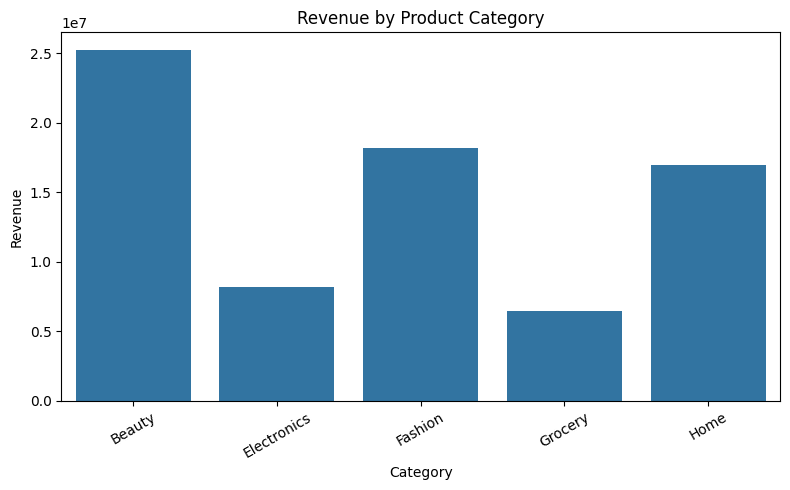

In [24]:
# Revenue by Category (Bar Chart)
category_revenue = df.groupby('Category')['Revenue'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_revenue, x='Category', y='Revenue')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


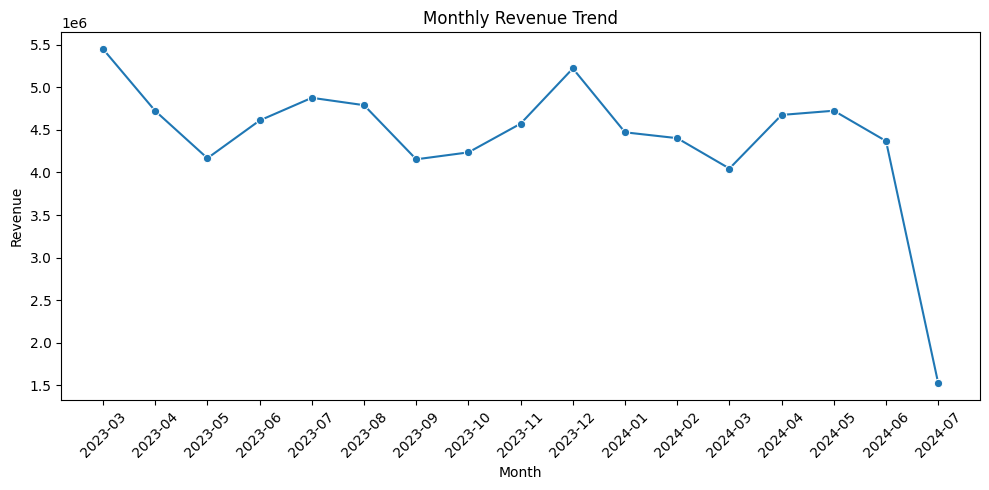

In [25]:
# Monthly Revenue Trend (Line Chart)
df['OrderMonth'] = df['OrderDate'].dt.to_period('M').astype(str)
monthly_revenue = df.groupby('OrderMonth')['Revenue'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x='OrderMonth', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


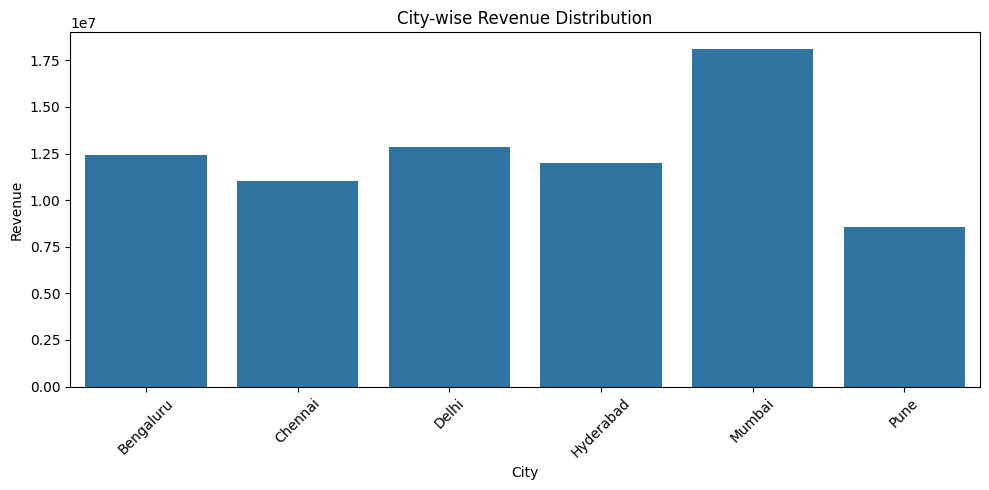

In [26]:
# City-wise Sales Distribution
city_revenue = df.groupby('City')['Revenue'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=city_revenue, x='City', y='Revenue')
plt.title('City-wise Revenue Distribution')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


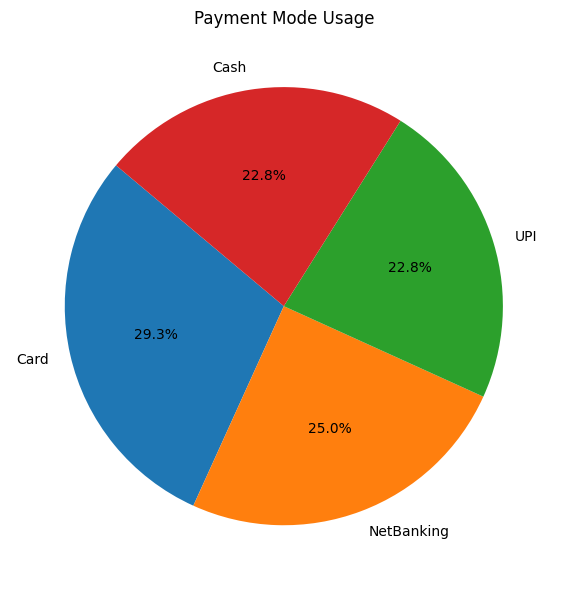

In [27]:
# Payment Mode Usage (Pie Chart)
payment_counts = df['PaymentMode'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Mode Usage')
plt.tight_layout()
plt.show()


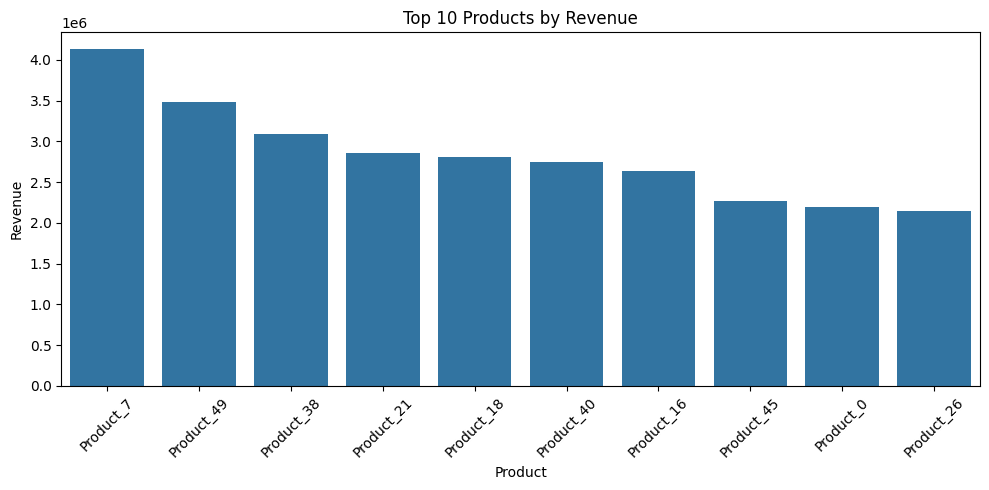

In [28]:
# Top 10 Products by Revenue (Bar Chart)
top_10_products = (
    df.groupby('ProductName')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=top_10_products, x='ProductName', y='Revenue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# TASK 6: BUSINESS INSIGHTS & RECOMMENDATIONS in Docs file......